In [12]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [13]:
# Load Data 
housing_df = pd.read_csv(Path("../../data/housing_data_TX_encoded.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
housing_df

,Identifier,Bedroom,Price,Average_Market_Days,RegionName_Austin,RegionName_Beaumont,RegionName_Brownwood,RegionName_Converse,RegionName_Coppell,RegionName_Crosby,...,CountyName_Jefferson County,CountyName_McLennan County,CountyName_Montgomery County,CountyName_Rockwall County,CountyName_Smith County,CountyName_Tarrant County,CountyName_Tom Green County,CountyName_Travis County,CountyName_Val Verde County,CountyName_Williamson County
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,2,1,67653.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,2,89995.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,3,116641.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,4,167849.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,5,303323.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,1431,4,240716.0,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-29,2307,4,230132.0,110.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-29,1241,5,281139.0,72.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
housing_df= housing_df.dropna()

In [15]:
# Creating the X and y sets
X = housing_df.drop(columns=["Price", "Identifier", "State_TX", "Metro_Houston-The Woodlands-Sugar Land"]).values
y = housing_df["Price"].values

In [16]:
X.shape

(6172, 64)

In [17]:
# Create a model with scikit-learn
model = LinearRegression()
model

LinearRegression()

In [18]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [19]:
# The slope
print(model.coef_)

[ 69499.69222831   -676.40257737  35676.74710272 -10054.91665134
  -8461.01244281  12547.92142347  49959.35573071  45459.46346354
  73134.79527629  -4712.78621842 -50892.65899918 -48652.00113838
  32389.50584499 -24189.32781786  -9568.08791025   9818.39522486
  -1581.1580492  -36014.73093821   6834.37358223  -4387.06456564
 -36633.11580152 -11296.23880415 -24353.06152607   -153.86327218
  10986.70899111  16040.70175789 -48100.44755293  42741.4990303
    844.51274011 -17383.50848008  68066.25294772 -10054.91665134
  -8461.01244281   1081.48171472  -4712.78621842 -48100.44755293
   -153.86327218  -1581.1580492  -11296.23880415   8999.96411337
  16040.70175789    844.51274011 -17383.50848008 -11805.1401026
  -8461.01244281   9818.39522486  19162.42630381  42741.4990303
  -1581.1580492  -48100.44755293  16040.70175789  10986.70899111
   -123.35538493   -153.86327218 -10054.91665134 -17383.50848008
   6834.37358223 -36633.11580152    844.51274011 -24189.32781786
 -11296.23880415  35676.7471

In [20]:
# The y-intercept
print(model.intercept_)

34376.351744200045


In [21]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)

In [22]:
predicted_y_values

array([  4223.05788726,  73722.75011557, 143222.44234388, ...,
       285876.65339417, 154375.95321058, 247799.22716817])

In [23]:
# Create a DataFrame of Real and Predicted values
housing_results = pd.DataFrame({
    "Actual": y.ravel(),
    "Predicted": predicted_y_values.ravel()
}, index = housing_df.index[-len(y): ]) 

# Show the DataFrame's head
housing_results.head()


,Actual,Predicted
Date,,
2010-01-31,67653.0,4223.057887
2010-01-31,89995.0,73722.750116
2010-01-31,116641.0,143222.442344
2010-01-31,167849.0,212722.134572
2010-01-31,303323.0,282221.826800


<AxesSubplot:title={'center':'Actual Housing Prices in Texas'}, xlabel='Date'>

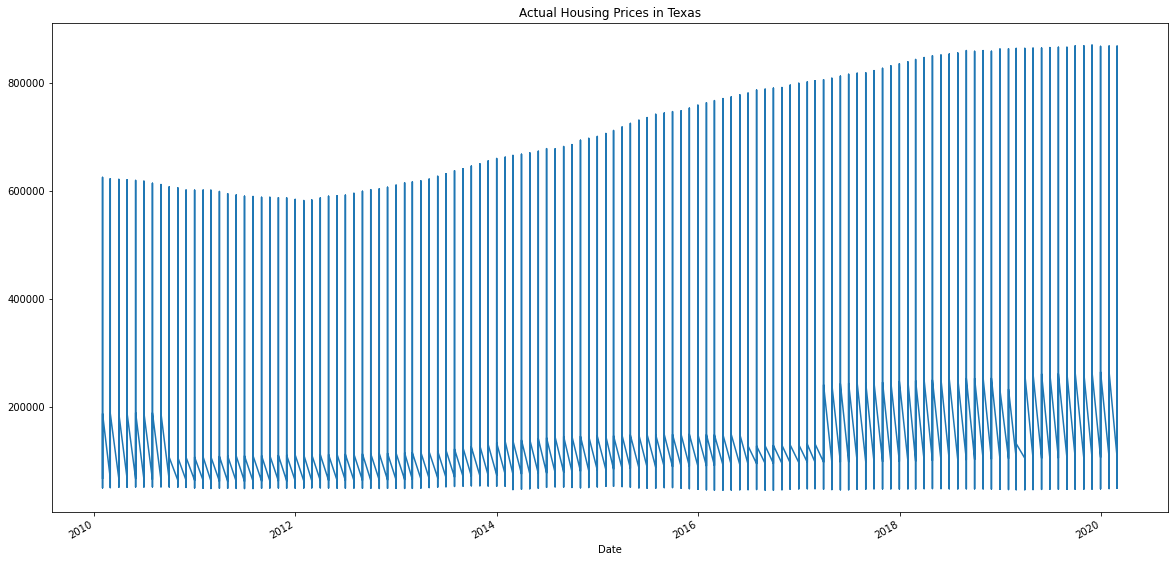

In [28]:
# Plot results
housing_results['Actual'].plot(kind='line', title="Actual Housing Prices in Texas", figsize=(20,10))

<AxesSubplot:title={'center':'Predicted Housing Prices in Texas'}, xlabel='Date'>

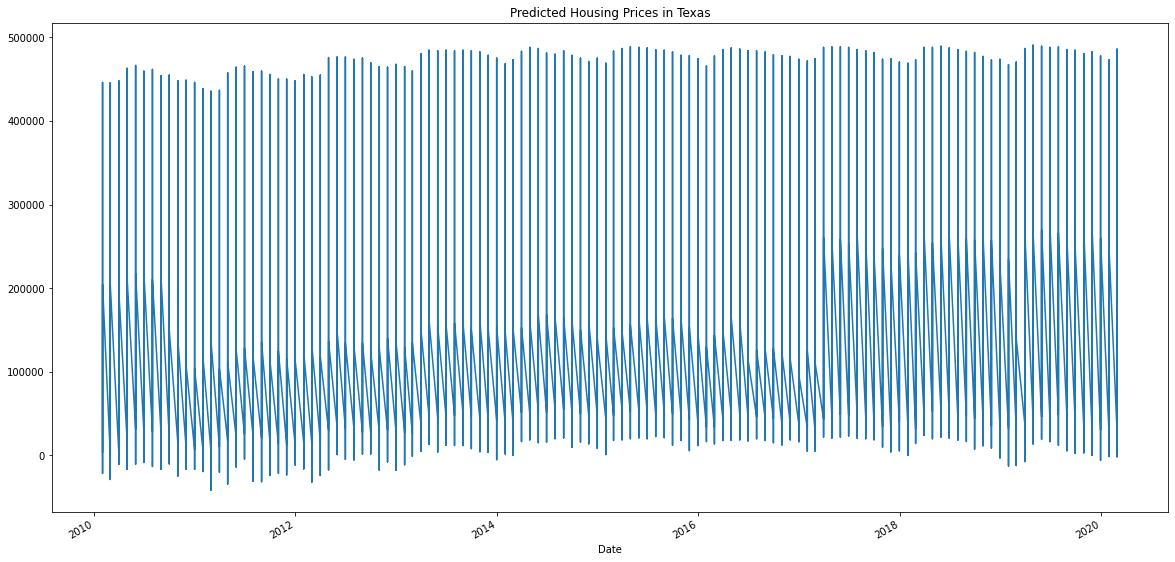

In [29]:
housing_results['Predicted'].plot(kind='line', title="Predicted Housing Prices in Texas", figsize=(20,10))

In [26]:
# Relevant metrics - score, r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [27]:
# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.7476250395047974.
The r2 is 0.7476250395047974.
The mean squared error is 4319800234.018631.
The root mean squared error is 65725.18721174274.
The standard deviation is 130830.40922898782.
